<a href="https://colab.research.google.com/github/hungrypro7/Shine_Coding/blob/main/04_maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습2 미로찾기

아래에 문제가 있습니다

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import random
from queue import Queue

def create_maze(dim):
    # Create a grid filled with walls
    maze = np.ones((dim*2+1, dim*2+1))

    # Define the starting point
    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    # Initialize the stack with the starting point
    stack = [(x, y)]
    while len(stack) > 0:
        x, y = stack[-1]

        # Define possible directions
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < dim and ny < dim and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()

    # Create an entrance and an exit
    maze[1, 0] = 0
    maze[-2, -1] = 0
    return maze

def draw_maze(maze, path=None):
    fig, ax = plt.subplots(figsize=(10,10))

    # Set the border color to white
    fig.patch.set_edgecolor('white')
    fig.patch.set_linewidth(0)

    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')

    # Draw the solution path if it exists
    if path is not None:
        x_coords = [x[1] for x in path]
        y_coords = [y[0] for y in path]
        ax.plot(x_coords, y_coords, color='red', linewidth=2)

    ax.set_xticks([])
    ax.set_yticks([])

    # Draw entry and exit arrows
    ax.arrow(0, 1, .4, 0, fc='green', ec='green', head_width=0.3, head_length=0.3)
    ax.arrow(maze.shape[1] - 1, maze.shape[0]  - 2, 0.4, 0, fc='blue', ec='blue', head_width=0.3, head_length=0.3)

    plt.show()

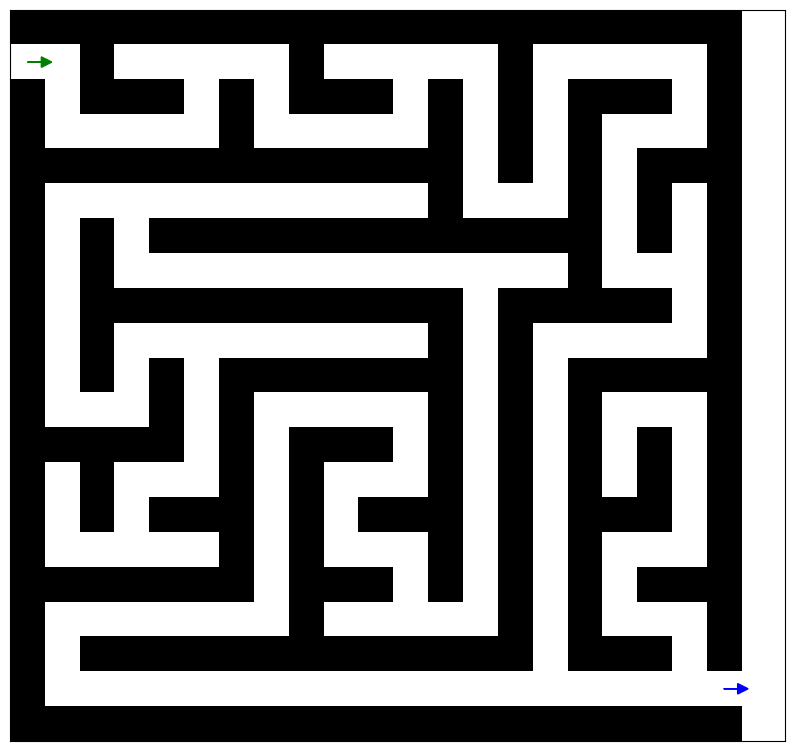

In [129]:
# 미로를 만들어 줍니다
dim = 10
maze = create_maze(dim)
draw_maze(maze)

# 미로를 찾는 알고리즘을 작성하세요

In [130]:
def find_path(maze):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    start = (1, 1)
    end = (maze.shape[0]-2, maze.shape[1]-2)    # (19, 19)
    visited = np.zeros_like(maze, dtype=bool)   # 모든 미로 지점에 대한 방문 여부 저장
    visited[start] = True
    queue = Queue()
    queue.put((start, []))  # 요소 추가

    x, y = 0, 0
    # 미로를 찾는 알고리즘을 작성하세요
    while (x, y) != end:
        pos, qu = queue.get()
        x, y = pos
        state = False
        for i in range(4):
            nx = x + directions[i][0]
            ny = y + directions[i][1]
            if maze[nx][ny] == 0 and not visited[(nx, ny)]:
                visited[(nx, ny)] = True
                qu.append((nx, ny))
                queue.put(((nx, ny), qu))
                state = True

            if state:
                break

    queue = qu
    return queue

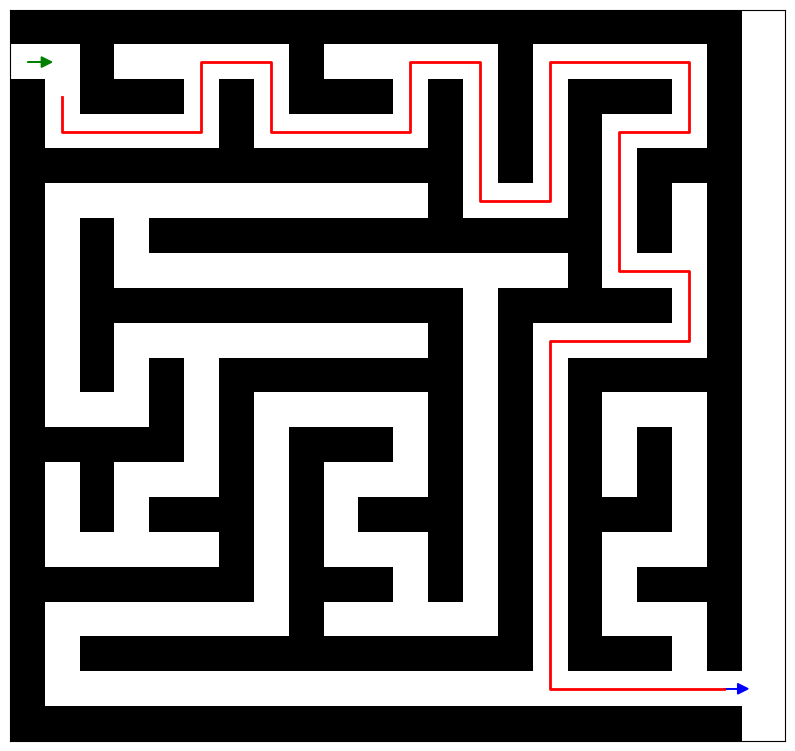

In [131]:
path = find_path(maze)
draw_maze(maze, path)